In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from pathlib import Path
import os

In [2]:
# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vinic\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [3]:
books = pd.read_csv(f"{path}/books.csv")
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
# Tipo de dados de cada coluna
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [5]:
# Análise descritiva das colunas incluindo colunas não númericas
books.describe(include='all')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6810,6810,2381,6738,6711,6481,6548,6804.000000,6767.000000,6767.000000,6.767000e+03
unique,NaN,6810,6398,2009,3780,567,6481,6474,NaN,NaN,NaN,NaN
top,NaN,9042003405,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=2lVyR...,No Marketing Blurb,NaN,NaN,NaN,NaN
freq,NaN,1,11,226,37,2588,1,6,NaN,NaN,NaN,NaN
mean,9.780677e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,420.000000,5.992500e+03


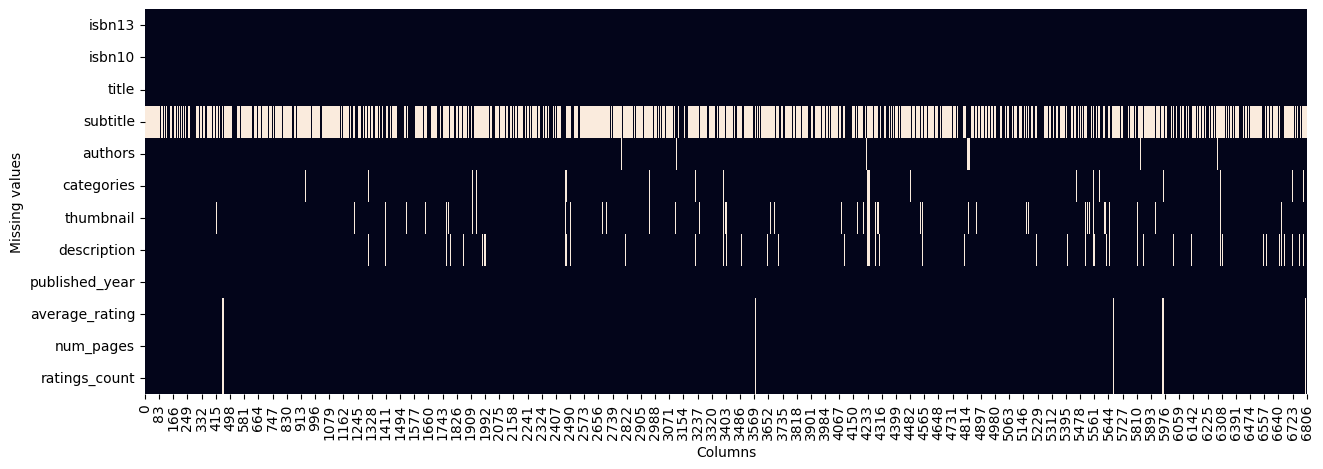

In [6]:
#visualização de quais colunas têm valores ausentes e em quais linhas

plt.figure(figsize=(15, 5))
ax = plt.axes()

#Pega os valores ausentes, faz uma transposiçao linha por colunas e transforma em um mapa de calor
sns.heatmap(books.isna().transpose(), 
            cbar=False, 
            ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

- O gráfico acima mostra que temos muitos valores ausentes para a coluna *subtitle* 
- Outras colunas também possuem algumas informações faltantes (authors, categories, thumbnail, description, average_rating, num_pages, ratings_count)

In [7]:
# Um dos campos importantes para a semantica é a descrição do livro. Vamos criar uma coluna que indica se a descrição está ausente ou não.
# Também será criada uma coluna que indica a idade do livro, considerando o ano atual como 2025.

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

In [8]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


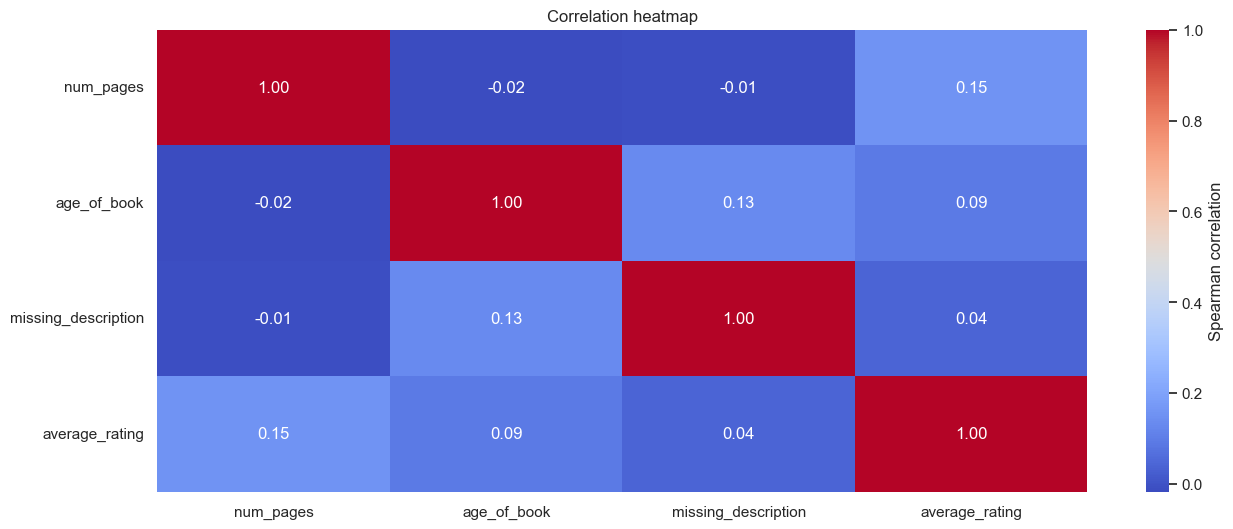

In [9]:
# Vamos analisar se as informações faltantes da descrição do livro tem relação com colunas que podem ser importantes para a semântica do livro.
# Será que a ausência de informação na descrição do livro gera alguns vies? Será que os livros com descrições ausentes tendem a ser, por exemplo, mais antigos, 
# mais curtos ou com avaliações mais baixas/altas? 
# Se houver algum um padrão, a remoção desses livros pode introduzir um viés na recomendação.

columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

# O método de correlação Spearman é melhor usado quando os dados não são continuos e atualmente estamos trabalhando com dados binarios (0 ou 1).
correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

## Análise da matriz de correlação

- Valores de correlação próximos a 1 ou -1 indicam uma correlação muito forte (positiva ou negativa, respectivamente)
- Valores de correlação próximos a 0 indicam uma correlação muito fraca, ou seja, não há uma relação significativa

Como os valores da variável de interesse (missing_description), neste contexto, era fraca (próximo do valor 0), não há problema em eliminar as linhas que estejam vazias. Com a análise de correlação temos maior confiaça para excliu-las.
Para uma substituição desses valores, possívelmente poderia ser feito um web-scrapping para completa-las.

In [10]:
book_missing = books.dropna(subset=["description", "num_pages", "average_rating", "published_year"])

# Ou pode usar esse script também:
# book_missing = books[~(books["description"].isna()) &
#       ~(books["num_pages"].isna()) &
#       ~(books["average_rating"].isna()) &
#       ~(books["published_year"].isna())
# ]


In [11]:
book_missing.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0


In [12]:
# Vamos analisar separadamente a coluna categories para a coluna com descrição não ausente.

book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)


,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


In [13]:
# # Vamos analisar a descrição dos livros e a quantidade de palavras que ela possui.
# book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

# plt.figure(figsize=(12, 6))

# # Histograma: X = número de palavras, Y = quantidade de livros
# sns.histplot(book_missing["words_in_description"], bins=200, kde=False, color='skyblue')

# plt.title("Distribuição da quantidade de palavras na descrição dos livros")
# plt.xlabel("Número de palavras na descrição")
# plt.ylabel("Quantidade de livros")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [14]:
# Vamos analisar a descrição dos livros e a quantidade de palavras que ela possui.
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

# Define intervalo para os bins (ex: de 0 até 1000, de 5 em 5)
max_palavras = book_missing["words_in_description"].max()
bins = np.arange(0, max_palavras + 5, 5)  # Bins de 0 a max, de 5 em 5

# Agrupa os dados nas faixas definidas
labels = [f"({i}-{i+5}]" for i in bins[:-1]]
book_missing["faixa_palavras"] = pd.cut(book_missing["words_in_description"], bins=bins, labels=labels, right=True)

# Conta quantos livros caem em cada faixa
tabela_faixas_df = book_missing["faixa_palavras"].value_counts().sort_index().reset_index()
tabela_faixas_df.columns = ["Faixa de nº de palavras", "Quantidade de livros"]

print(tabela_faixas_df)

# Obs: ( indica que o limite inferior está excluído e ] indica que o limite superior está incluído

    Faixa de nº de palavras  Quantidade de livros
0                     (0-5]                    66
1                    (5-10]                    91
2                   (10-15]                   293
3                   (15-20]                   462
4                   (20-25]                   507
..                      ...                   ...
179               (895-900]                     0
180               (900-905]                     0
181               (905-910]                     0
182               (910-915]                     0
183               (915-920]                     1

[184 rows x 2 columns]


C:\Users\vinic\AppData\Local\Temp\ipykernel_20508\1673525472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
C:\Users\vinic\AppData\Local\Temp\ipykernel_20508\1673525472.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["faixa_palavras"] = pd.cut(book_missing["words_in_description"], bins=bins, labels=labels, right=True)


In [15]:
book_missing.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,faixa_palavras
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,(195-200]
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,(200-205]
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14,(10-15]
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,(55-60]
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,(40-45]


In [16]:
import plotly.express as px
import pandas as pd
import numpy as np

# Contagem exata
contagem = book_missing["words_in_description"].value_counts().sort_index()

# Reindexando para garantir que todas as faixas de 0 a 300 existam
full_range = np.arange(0, 301)
contagem_full = contagem.reindex(full_range, fill_value=0).reset_index()
contagem_full.columns = ["num_palavras", "qtd_livros"]

# Ticks de 10 em 10
tick_vals = np.arange(0, 301, 10)

fig = px.bar(
    contagem_full,
    x="num_palavras",
    y="qtd_livros",
    title="Distribuição exata de palavras na descrição dos livros",
    labels={"num_palavras": "Número exato de palavras", "qtd_livros": "Quantidade de livros"},
    color_discrete_sequence=['skyblue']
)

fig.update_layout(
    xaxis_tickmode='array',
    xaxis_tickvals=tick_vals,
    xaxis_tickangle=-45
)

fig.show()


In [17]:
import plotly.express as px

# Função para extrair o número inicial de cada faixa (ex: "(195-200]" -> 195)
def faixa_inicio(faixa):
    # Remove qualquer caractere não numérico do início
    return int(faixa.split("-")[0].replace("(", "").replace("[", ""))

# Ordena as faixas com base no número inicial
ordem_faixas = sorted(book_missing["faixa_palavras"].unique(), key=faixa_inicio)

fig = px.histogram(
    book_missing,
    x="faixa_palavras",
    color_discrete_sequence=['skyblue'],
    title="Distribuição da quantidade de palavras na descrição dos livros",
    category_orders={"faixa_palavras": ordem_faixas}
)

fig.update_layout(
    xaxis_title="Número de palavras na descrição",
    yaxis_title="Quantidade de livros",
    xaxis_tickangle=-45
)

fig.show()


- Temos alguns livros com poucas palavras no campo descrição, o que não faz muito sentido. Devido a isso precisa ser feito um corte dos livros que tem poucas palavras
pra descreve-lo e que impactaria nas recomendações.
Inicialmente vamos cortar livros com menos de 25 palavras.

In [18]:
book_missing.loc[book_missing["words_in_description"].between(1,25), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
6                                               Donation.
10      One of Sidney Sheldon's most popular and bests...
11                                         Fantasy-roman.
32      Tells the story of three generations of Chines...
                              ...                        
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6794                                 源氏物語54帖、「宮田切り絵」の真骨頂。
6795    Book Of Five Rings is a Kodansha International...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 1419, dtype: object

In [19]:
books_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]
books_missing_25_words.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,faixa_palavras
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,(195-200]
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,(200-205]
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,(55-60]
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,(40-45]
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,(70-75]
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,(75-80]
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,(155-160]
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30,(25-30]
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,30.0,136,(135-140]
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,29.0,46,(45-50]


In [20]:
# Agora será criado uma nova coluna com o título e o subtitulo do livro, caso exista, e a descrição do livro.
books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"],
             books_missing_25_words[["title", "subtitle"]].astype(str).agg(': '.join, axis=1))
)
books_missing_25_words.head(10)

C:\Users\vinic\AppData\Local\Temp\ipykernel_20508\586242746.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,faixa_palavras,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,(195-200],Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,(200-205],Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,(55-60],Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,(40-45],The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,(70-75],The Problem of Pain
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,(75-80],Empires of the Monsoon: A History of the India...
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,(155-160],The Gap Into Madness: Chaos and Order
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30,(25-30],Master of the Game
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,30.0,136,(135-140],Warhost of Vastmark
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,29.0,46,(45-50],The Once and Future King


In [21]:
# Por fim um identificador único para cada livro, que será usado posteriormente para as recomendações.
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

C:\Users\vinic\AppData\Local\Temp\ipykernel_20508\4058852508.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
books_missing_25_words.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,faixa_palavras,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,(195-200],Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,(200-205],Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,(55-60],Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,(40-45],The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,(70-75],The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,(75-80],Empires of the Monsoon: A History of the India...,9780006380832 Until Vasco da Gama discovered t...
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,(155-160],The Gap Into Madness: Chaos and Order,9780006470229 A new-cover reissue of the fourt...
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30,(25-30],Master of the Game,9780006472612 Kate Blackwell is an enigma and ...
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,30.0,136,(135-140],Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,29.0,46,(45-50],The Once and Future King,9780006483014 An omnibus volume of the author'...


In [ ]:
# Drop colunas que não serão utilizadas e salvas o arquivos em .csv
load_dotenv()  # carrega as variáveis do .env

# pega o caminho da variável de ambiente e converte em Path
path = Path(os.getenv("DATASETS_PATH"))
path.mkdir(parents=True, exist_ok=True)  # cria a pasta se não existir

(
    books_missing_25_words
    .drop(columns=["subtitle", "missing_description", "age_of_book", "words_in_description", "faixa_palavras"])
    .to_csv(f"{path}/books_cleaned.csv", index=False)
)